In [150]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import differential_evolution

In [151]:
def probs(a, b, c, Ew1, Ew2, Ebp, Estep):
    shift = 15
    end = 24
    probs = []
    for i in range(end):
        if i in range(0, shift):
            Et = Ew1 + i*Ebp
            p = b/(1+a*np.exp(Et)) + c
        if i in range(shift, end):
            Et = Ew1 + Ew2 + i*Ebp
            p = (b/(1+a*np.exp(Et)))*(1/(1+np.exp(-(i-shift)*Estep-5))) + c
        probs.append(p)
    return probs

In [152]:
def minimizee(x):
    data_dCas9_TXTL = [19.7, 18.32, 155.32, 192.11, 282.15, 266.17, 261.61, 246.78, 131.71,
                      9.59, 5.82, 37.93, 12.14, 14.57, 24.51]
    pick = [0, 5, 8, 9, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23]
    fit_probs = np.take(probs(x[0], x[1], x[2], x[3], x[4], x[5], x[6]),
                        pick)
    return np.sum(np.square(np.subtract(data_dCas9_TXTL, fit_probs)))

In [153]:
a = 10
b = 170
c = 12
Ew1 = 8
Ew2 = 3
shift = 16
Ebp = -1
Estep = -1

In [154]:
probs(a, b, c, Ew1, Ew2, Ebp, Estep)

[12.005702673370964,
 12.015500579944495,
 12.042128344430783,
 12.114467971072235,
 12.310796617247547,
 12.842187159285897,
 14.269978990066239,
 18.032044002247677,
 27.454545454545453,
 48.334146158327975,
 84.23736180225777,
 125.49444371425633,
 155.68345689268565,
 171.26856828289618,
 177.88804643808663,
 154.72180493541703,
 168.4039303733983,
 170.02066098603964,
 160.38243063126205,
 135.86443946344008,
 96.89523096179113,
 57.699294185437026,
 32.26111279332447,
 20.061903099740185]

In [155]:
bounds = [(0.01, 100), (230, 270), (5, 30), (2, 15), (2, 15), (-0.5, -3), (-0.25, -7)]

In [156]:
#Fitting
result = differential_evolution(func = minimizee, bounds = bounds, maxiter = 200, popsize = 100)

In [157]:
new_x = result.x

In [5]:
new_x = [ 16.75065735, 256.22302521,  15.74896995,   5.66489345,
         5.14594645,  -1.06326   ,  -2.6359347 ]

In [158]:
full_length = probs(new_x[0], new_x[1], new_x[2], new_x[3], new_x[4], new_x[5], new_x[6])
x = np.arange(0, 30, 1)

In [159]:
data_Cas9_TXTL = [[0, 5, 8, 9, 11, 12, 14, 15, 17, 18, 19, 20, 21, 22, 23],
        [19.7, 18.32, 155.32, 192.11, 282.15, 266.17, 261.61, 246.78, 131.71,
                      9.59, 5.82, 37.93, 12.14, 14.57, 24.51],
        [4.38, 1.94, 1.16, 20.59, 28.14, 22.93, 10.05, 11.77, 8.11, 1.74, 2.21, 3.23, 1.27, 1.42, 1.74]]

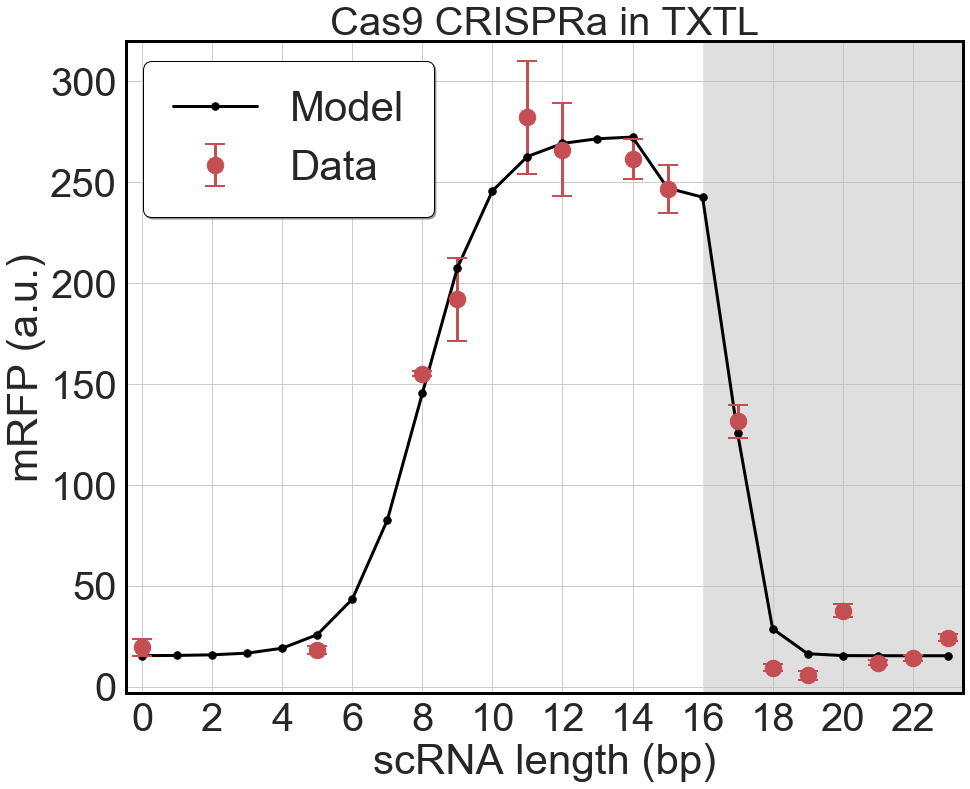

In [179]:
ax = plt.axes()
plt.plot(x[:24], full_length[:24], lw = 3, c = 'black', label = 'Model', marker = '.', ms = '15')
plt.errorbar(data_Cas9_TXTL[0], data_Cas9_TXTL[1], data_Cas9_TXTL[2], fmt = '.', 
             ecolor = 'r', capsize = 10, elinewidth = 3,
             capthick = 2, color = 'r', ms = '33', label = 'Data')
sns.set(font_scale = 2)
sns.set_style("whitegrid")
ax.set_title('Cas9 CRISPRa in TXTL', fontsize = 40)
plt.ylabel('mRFP (a.u.)', fontsize = 42)
plt.xlabel('scRNA length (bp)', fontsize = 42)
plt.xticks(np.arange(0, 33, 2), fontsize = 40)
plt.yticks(fontsize = 40)
plt.xlim(-0.45, 23.45)
plt.ylim(-3, 320)
plt.axvspan(16, 24, facecolor='silver', alpha=0.5)
plt.rcParams["figure.figsize"] = (15, 12)
first_legend = plt.legend(loc=[0.02, 0.73], fancybox =True, borderpad = 0.7, framealpha =1,
                         fontsize = 42, edgecolor = 'black', shadow = 'True')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 3
plt.show()